In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from utils.utils import *
from utils.model_utils import cross_validate, regression_metrics
from utils.model_vis import *

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import BatchNormalization, Dropout
# from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import *
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2, l2

import warnings
warnings.filterwarnings('ignore')

In [15]:
# path = "./Models/start_199201_end_202005_test_201411_seq_12/"
path = "./Models/start_196601_end_202005_test_200909_seq_12/"
predicted_feature = 'Fed_rate_month_avg_diff'
SEED = 100

In [16]:
Y_test, Y_train = open_files(path=path,
                             file_names=get_file_names(path=path, extension=".csv")
                            ).values()

X_test, X_train = open_files(path=path,
                             file_names=get_file_names(path=path, extension=".joblib")
                            ).values()

Y_train['Date'] = pd.to_datetime(Y_train['Date'])
Y_test['Date'] = pd.to_datetime(Y_test['Date'])

In [17]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [18]:
params = {}
params["loss"] = "mae"
params["lstm_params"] = {"units": 12, "dropout": .2}
params["batch_norm"] = True
params["dense_params"] = {"kernel_regularizer": (1e-5, 1e-4), "bias_regularizer": (None, 1e-4)}
params["optimizer"] = {"type": "adam", "learning_rate": 1e-3, "decay": 1e-5}

In [19]:
inputs = Input(shape=X_train.shape[1:])
y = Dropout(.2)(inputs)
y = LSTM(units=12, dropout=.1)(y)
y = BatchNormalization()(y)
y = Dense(units=1,
          kernel_regularizer=l2(1e-4),
          bias_regularizer=l2(1e-4)
         )(y)
model = Model(inputs, y, name="LSTM_12")
model.compile(loss="mae",
              optimizer=Adam(learning_rate=1e-3, decay=1e-5),
              metrics=["mae", "mape", root_mean_squared_error]
             )
model.summary()

Model: "LSTM_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12, 25)]          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 25)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12)                1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 1,885
Trainable params: 1,861
Non-trainable params: 24
_________________________________________________________________


In [20]:
history = model.fit(
    x=X_train,
    y=Y_train[predicted_feature],
    batch_size=32,
    epochs=1000,
    validation_data=(X_test, Y_test[predicted_feature]),
    verbose=2
)

Train on 512 samples, validate on 128 samples
Epoch 1/1000
512/512 - 2s - loss: 1.1119 - mae: 1.1117 - mape: 35774888.0000 - root_mean_squared_error: 1.4222 - val_loss: 0.2231 - val_mae: 0.2229 - val_mape: 61247988.0000 - val_root_mean_squared_error: 0.2729
Epoch 2/1000
512/512 - 0s - loss: 0.8470 - mae: 0.8468 - mape: 28875810.0000 - root_mean_squared_error: 1.1071 - val_loss: 0.2337 - val_mae: 0.2335 - val_mape: 65081800.0000 - val_root_mean_squared_error: 0.2848
Epoch 3/1000
512/512 - 0s - loss: 0.6933 - mae: 0.6931 - mape: 28747300.0000 - root_mean_squared_error: 0.9144 - val_loss: 0.2367 - val_mae: 0.2365 - val_mape: 67790976.0000 - val_root_mean_squared_error: 0.2915
Epoch 4/1000
512/512 - 0s - loss: 0.6150 - mae: 0.6148 - mape: 21660834.0000 - root_mean_squared_error: 0.8314 - val_loss: 0.2319 - val_mae: 0.2317 - val_mape: 66786800.0000 - val_root_mean_squared_error: 0.2902
Epoch 5/1000
512/512 - 0s - loss: 0.5463 - mae: 0.5461 - mape: 16687873.0000 - root_mean_squared_error: 0.

Epoch 40/1000
512/512 - 0s - loss: 0.2820 - mae: 0.2819 - mape: 6725361.5000 - root_mean_squared_error: 0.4945 - val_loss: 0.2195 - val_mae: 0.2194 - val_mape: 67487824.0000 - val_root_mean_squared_error: 0.2694
Epoch 41/1000
512/512 - 0s - loss: 0.2731 - mae: 0.2730 - mape: 4530835.0000 - root_mean_squared_error: 0.4681 - val_loss: 0.2231 - val_mae: 0.2230 - val_mape: 68474128.0000 - val_root_mean_squared_error: 0.2744
Epoch 42/1000
512/512 - 0s - loss: 0.2755 - mae: 0.2754 - mape: 4149412.2500 - root_mean_squared_error: 0.4773 - val_loss: 0.2265 - val_mae: 0.2264 - val_mape: 72191328.0000 - val_root_mean_squared_error: 0.2791
Epoch 43/1000
512/512 - 0s - loss: 0.2696 - mae: 0.2695 - mape: 5160429.0000 - root_mean_squared_error: 0.4769 - val_loss: 0.2156 - val_mae: 0.2155 - val_mape: 69561224.0000 - val_root_mean_squared_error: 0.2703
Epoch 44/1000
512/512 - 0s - loss: 0.2658 - mae: 0.2657 - mape: 5624650.0000 - root_mean_squared_error: 0.4703 - val_loss: 0.2198 - val_mae: 0.2197 - va

Epoch 79/1000
512/512 - 0s - loss: 0.2407 - mae: 0.2406 - mape: 3293899.0000 - root_mean_squared_error: 0.4410 - val_loss: 0.1830 - val_mae: 0.1829 - val_mape: 59169724.0000 - val_root_mean_squared_error: 0.2327
Epoch 80/1000
512/512 - 0s - loss: 0.2412 - mae: 0.2411 - mape: 3256768.2500 - root_mean_squared_error: 0.4439 - val_loss: 0.1968 - val_mae: 0.1967 - val_mape: 63621004.0000 - val_root_mean_squared_error: 0.2434
Epoch 81/1000
512/512 - 0s - loss: 0.2403 - mae: 0.2402 - mape: 4341540.0000 - root_mean_squared_error: 0.4413 - val_loss: 0.1862 - val_mae: 0.1861 - val_mape: 59439740.0000 - val_root_mean_squared_error: 0.2342
Epoch 82/1000
512/512 - 0s - loss: 0.2405 - mae: 0.2405 - mape: 4313526.0000 - root_mean_squared_error: 0.4549 - val_loss: 0.1860 - val_mae: 0.1859 - val_mape: 58687628.0000 - val_root_mean_squared_error: 0.2343
Epoch 83/1000
512/512 - 0s - loss: 0.2523 - mae: 0.2522 - mape: 3972043.2500 - root_mean_squared_error: 0.4596 - val_loss: 0.1913 - val_mae: 0.1912 - va

Epoch 118/1000
512/512 - 0s - loss: 0.2424 - mae: 0.2423 - mape: 4487902.5000 - root_mean_squared_error: 0.4695 - val_loss: 0.1541 - val_mae: 0.1540 - val_mape: 48220368.0000 - val_root_mean_squared_error: 0.2033
Epoch 119/1000
512/512 - 0s - loss: 0.2293 - mae: 0.2292 - mape: 3784658.2500 - root_mean_squared_error: 0.4247 - val_loss: 0.1563 - val_mae: 0.1562 - val_mape: 49486672.0000 - val_root_mean_squared_error: 0.2057
Epoch 120/1000
512/512 - 0s - loss: 0.2222 - mae: 0.2222 - mape: 2535524.7500 - root_mean_squared_error: 0.4027 - val_loss: 0.1607 - val_mae: 0.1606 - val_mape: 50460020.0000 - val_root_mean_squared_error: 0.2100
Epoch 121/1000
512/512 - 0s - loss: 0.2249 - mae: 0.2249 - mape: 2765049.7500 - root_mean_squared_error: 0.4250 - val_loss: 0.1510 - val_mae: 0.1509 - val_mape: 48350312.0000 - val_root_mean_squared_error: 0.2030
Epoch 122/1000
512/512 - 0s - loss: 0.2229 - mae: 0.2228 - mape: 4042565.5000 - root_mean_squared_error: 0.4202 - val_loss: 0.1502 - val_mae: 0.1501

Epoch 157/1000
512/512 - 0s - loss: 0.2253 - mae: 0.2253 - mape: 2866665.0000 - root_mean_squared_error: 0.4254 - val_loss: 0.1394 - val_mae: 0.1393 - val_mape: 41662480.0000 - val_root_mean_squared_error: 0.1897
Epoch 158/1000
512/512 - 0s - loss: 0.2235 - mae: 0.2235 - mape: 3283912.5000 - root_mean_squared_error: 0.4151 - val_loss: 0.1421 - val_mae: 0.1421 - val_mape: 44213932.0000 - val_root_mean_squared_error: 0.1959
Epoch 159/1000
512/512 - 0s - loss: 0.2163 - mae: 0.2163 - mape: 2664811.0000 - root_mean_squared_error: 0.4016 - val_loss: 0.1441 - val_mae: 0.1440 - val_mape: 43135340.0000 - val_root_mean_squared_error: 0.1961
Epoch 160/1000
512/512 - 0s - loss: 0.2166 - mae: 0.2165 - mape: 3140189.0000 - root_mean_squared_error: 0.4017 - val_loss: 0.1383 - val_mae: 0.1382 - val_mape: 41804628.0000 - val_root_mean_squared_error: 0.1891
Epoch 161/1000
512/512 - 0s - loss: 0.2163 - mae: 0.2162 - mape: 3746227.2500 - root_mean_squared_error: 0.4138 - val_loss: 0.1414 - val_mae: 0.1413

Epoch 196/1000
512/512 - 0s - loss: 0.2175 - mae: 0.2174 - mape: 4356040.5000 - root_mean_squared_error: 0.4139 - val_loss: 0.1359 - val_mae: 0.1358 - val_mape: 41093944.0000 - val_root_mean_squared_error: 0.1933
Epoch 197/1000
512/512 - 0s - loss: 0.2090 - mae: 0.2089 - mape: 4044842.0000 - root_mean_squared_error: 0.3805 - val_loss: 0.1367 - val_mae: 0.1366 - val_mape: 41305288.0000 - val_root_mean_squared_error: 0.1924
Epoch 198/1000
512/512 - 0s - loss: 0.2100 - mae: 0.2100 - mape: 3355721.2500 - root_mean_squared_error: 0.3928 - val_loss: 0.1336 - val_mae: 0.1335 - val_mape: 40244268.0000 - val_root_mean_squared_error: 0.1916
Epoch 199/1000
512/512 - 0s - loss: 0.2144 - mae: 0.2144 - mape: 3484052.2500 - root_mean_squared_error: 0.4111 - val_loss: 0.1324 - val_mae: 0.1323 - val_mape: 38617316.0000 - val_root_mean_squared_error: 0.1912
Epoch 200/1000
512/512 - 0s - loss: 0.2137 - mae: 0.2136 - mape: 2535255.2500 - root_mean_squared_error: 0.4006 - val_loss: 0.1386 - val_mae: 0.1385

Epoch 235/1000
512/512 - 0s - loss: 0.2125 - mae: 0.2125 - mape: 3104826.5000 - root_mean_squared_error: 0.4149 - val_loss: 0.1485 - val_mae: 0.1484 - val_mape: 43389368.0000 - val_root_mean_squared_error: 0.2127
Epoch 236/1000
512/512 - 0s - loss: 0.2120 - mae: 0.2119 - mape: 2955612.7500 - root_mean_squared_error: 0.3995 - val_loss: 0.1467 - val_mae: 0.1466 - val_mape: 43217812.0000 - val_root_mean_squared_error: 0.2110
Epoch 237/1000
512/512 - 0s - loss: 0.2127 - mae: 0.2126 - mape: 2421961.7500 - root_mean_squared_error: 0.3934 - val_loss: 0.1460 - val_mae: 0.1459 - val_mape: 41941752.0000 - val_root_mean_squared_error: 0.2084
Epoch 238/1000
512/512 - 0s - loss: 0.2067 - mae: 0.2066 - mape: 3459294.7500 - root_mean_squared_error: 0.3772 - val_loss: 0.1451 - val_mae: 0.1450 - val_mape: 42061216.0000 - val_root_mean_squared_error: 0.2094
Epoch 239/1000
512/512 - 0s - loss: 0.2024 - mae: 0.2023 - mape: 2989650.7500 - root_mean_squared_error: 0.3860 - val_loss: 0.1456 - val_mae: 0.1455

Epoch 274/1000
512/512 - 0s - loss: 0.1921 - mae: 0.1920 - mape: 3407358.2500 - root_mean_squared_error: 0.3614 - val_loss: 0.1423 - val_mae: 0.1422 - val_mape: 41918504.0000 - val_root_mean_squared_error: 0.2096
Epoch 275/1000
512/512 - 0s - loss: 0.2109 - mae: 0.2108 - mape: 4219267.0000 - root_mean_squared_error: 0.3818 - val_loss: 0.1452 - val_mae: 0.1451 - val_mape: 43082728.0000 - val_root_mean_squared_error: 0.2102
Epoch 276/1000
512/512 - 0s - loss: 0.1959 - mae: 0.1958 - mape: 2369375.0000 - root_mean_squared_error: 0.3653 - val_loss: 0.1485 - val_mae: 0.1485 - val_mape: 43791568.0000 - val_root_mean_squared_error: 0.2126
Epoch 277/1000
512/512 - 0s - loss: 0.2038 - mae: 0.2037 - mape: 2965851.2500 - root_mean_squared_error: 0.3618 - val_loss: 0.1489 - val_mae: 0.1488 - val_mape: 44699968.0000 - val_root_mean_squared_error: 0.2167
Epoch 278/1000
512/512 - 0s - loss: 0.1951 - mae: 0.1950 - mape: 2888079.5000 - root_mean_squared_error: 0.3588 - val_loss: 0.1463 - val_mae: 0.1463

Epoch 313/1000
512/512 - 0s - loss: 0.1916 - mae: 0.1915 - mape: 3347708.0000 - root_mean_squared_error: 0.3553 - val_loss: 0.1418 - val_mae: 0.1418 - val_mape: 43105940.0000 - val_root_mean_squared_error: 0.2121
Epoch 314/1000
512/512 - 0s - loss: 0.1914 - mae: 0.1913 - mape: 3340266.0000 - root_mean_squared_error: 0.3705 - val_loss: 0.1393 - val_mae: 0.1392 - val_mape: 40736176.0000 - val_root_mean_squared_error: 0.2075
Epoch 315/1000
512/512 - 0s - loss: 0.1960 - mae: 0.1959 - mape: 2584138.7500 - root_mean_squared_error: 0.3697 - val_loss: 0.1430 - val_mae: 0.1429 - val_mape: 42985116.0000 - val_root_mean_squared_error: 0.2139
Epoch 316/1000
512/512 - 0s - loss: 0.2027 - mae: 0.2026 - mape: 4035786.0000 - root_mean_squared_error: 0.3766 - val_loss: 0.1483 - val_mae: 0.1482 - val_mape: 45436392.0000 - val_root_mean_squared_error: 0.2199
Epoch 317/1000
512/512 - 0s - loss: 0.2014 - mae: 0.2013 - mape: 2998878.2500 - root_mean_squared_error: 0.3858 - val_loss: 0.1452 - val_mae: 0.1452

Epoch 352/1000
512/512 - 0s - loss: 0.1898 - mae: 0.1897 - mape: 3985449.2500 - root_mean_squared_error: 0.3535 - val_loss: 0.1534 - val_mae: 0.1533 - val_mape: 47327864.0000 - val_root_mean_squared_error: 0.2224
Epoch 353/1000
512/512 - 0s - loss: 0.2042 - mae: 0.2042 - mape: 3818571.5000 - root_mean_squared_error: 0.3808 - val_loss: 0.1525 - val_mae: 0.1524 - val_mape: 46755388.0000 - val_root_mean_squared_error: 0.2212
Epoch 354/1000
512/512 - 0s - loss: 0.2002 - mae: 0.2002 - mape: 2819278.2500 - root_mean_squared_error: 0.3668 - val_loss: 0.1677 - val_mae: 0.1676 - val_mape: 51365488.0000 - val_root_mean_squared_error: 0.2362
Epoch 355/1000
512/512 - 0s - loss: 0.1938 - mae: 0.1937 - mape: 2876686.0000 - root_mean_squared_error: 0.3519 - val_loss: 0.1535 - val_mae: 0.1534 - val_mape: 47278564.0000 - val_root_mean_squared_error: 0.2239
Epoch 356/1000
512/512 - 0s - loss: 0.1932 - mae: 0.1931 - mape: 3293731.2500 - root_mean_squared_error: 0.3595 - val_loss: 0.1638 - val_mae: 0.1638

Epoch 391/1000
512/512 - 0s - loss: 0.1949 - mae: 0.1948 - mape: 2807007.7500 - root_mean_squared_error: 0.3529 - val_loss: 0.1557 - val_mae: 0.1556 - val_mape: 48348936.0000 - val_root_mean_squared_error: 0.2245
Epoch 392/1000
512/512 - 0s - loss: 0.1886 - mae: 0.1885 - mape: 2187583.0000 - root_mean_squared_error: 0.3656 - val_loss: 0.1560 - val_mae: 0.1559 - val_mape: 48187072.0000 - val_root_mean_squared_error: 0.2265
Epoch 393/1000
512/512 - 0s - loss: 0.1914 - mae: 0.1913 - mape: 2781063.5000 - root_mean_squared_error: 0.3498 - val_loss: 0.1504 - val_mae: 0.1503 - val_mape: 48200164.0000 - val_root_mean_squared_error: 0.2184
Epoch 394/1000
512/512 - 0s - loss: 0.1810 - mae: 0.1809 - mape: 3380194.0000 - root_mean_squared_error: 0.3508 - val_loss: 0.1509 - val_mae: 0.1508 - val_mape: 48350172.0000 - val_root_mean_squared_error: 0.2180
Epoch 395/1000
512/512 - 0s - loss: 0.1887 - mae: 0.1886 - mape: 3226667.5000 - root_mean_squared_error: 0.3615 - val_loss: 0.1549 - val_mae: 0.1549

Epoch 430/1000
512/512 - 0s - loss: 0.1913 - mae: 0.1912 - mape: 2226075.2500 - root_mean_squared_error: 0.3518 - val_loss: 0.1523 - val_mae: 0.1522 - val_mape: 47922336.0000 - val_root_mean_squared_error: 0.2163
Epoch 431/1000
512/512 - 0s - loss: 0.1910 - mae: 0.1910 - mape: 4074264.2500 - root_mean_squared_error: 0.3478 - val_loss: 0.1488 - val_mae: 0.1487 - val_mape: 46316648.0000 - val_root_mean_squared_error: 0.2162
Epoch 432/1000
512/512 - 0s - loss: 0.1872 - mae: 0.1872 - mape: 2242614.5000 - root_mean_squared_error: 0.3487 - val_loss: 0.1508 - val_mae: 0.1507 - val_mape: 47235316.0000 - val_root_mean_squared_error: 0.2178
Epoch 433/1000
512/512 - 0s - loss: 0.1928 - mae: 0.1928 - mape: 2088906.1250 - root_mean_squared_error: 0.3413 - val_loss: 0.1473 - val_mae: 0.1473 - val_mape: 45855152.0000 - val_root_mean_squared_error: 0.2126
Epoch 434/1000
512/512 - 0s - loss: 0.1844 - mae: 0.1843 - mape: 3237565.0000 - root_mean_squared_error: 0.3365 - val_loss: 0.1487 - val_mae: 0.1486

Epoch 469/1000
512/512 - 0s - loss: 0.1946 - mae: 0.1946 - mape: 4624727.0000 - root_mean_squared_error: 0.3460 - val_loss: 0.1418 - val_mae: 0.1417 - val_mape: 42152744.0000 - val_root_mean_squared_error: 0.2028
Epoch 470/1000
512/512 - 0s - loss: 0.1895 - mae: 0.1894 - mape: 4048322.0000 - root_mean_squared_error: 0.3391 - val_loss: 0.1467 - val_mae: 0.1466 - val_mape: 46021820.0000 - val_root_mean_squared_error: 0.2105
Epoch 471/1000
512/512 - 0s - loss: 0.1902 - mae: 0.1901 - mape: 2742361.5000 - root_mean_squared_error: 0.3671 - val_loss: 0.1465 - val_mae: 0.1464 - val_mape: 45586544.0000 - val_root_mean_squared_error: 0.2089
Epoch 472/1000
512/512 - 0s - loss: 0.1909 - mae: 0.1908 - mape: 3938242.2500 - root_mean_squared_error: 0.3615 - val_loss: 0.1404 - val_mae: 0.1403 - val_mape: 42507368.0000 - val_root_mean_squared_error: 0.2025
Epoch 473/1000
512/512 - 0s - loss: 0.1871 - mae: 0.1870 - mape: 3153616.0000 - root_mean_squared_error: 0.3396 - val_loss: 0.1382 - val_mae: 0.1381

Epoch 508/1000
512/512 - 0s - loss: 0.1794 - mae: 0.1793 - mape: 2677884.5000 - root_mean_squared_error: 0.3143 - val_loss: 0.1367 - val_mae: 0.1366 - val_mape: 41793200.0000 - val_root_mean_squared_error: 0.1974
Epoch 509/1000
512/512 - 0s - loss: 0.1847 - mae: 0.1847 - mape: 2685477.2500 - root_mean_squared_error: 0.3416 - val_loss: 0.1373 - val_mae: 0.1372 - val_mape: 41603912.0000 - val_root_mean_squared_error: 0.1990
Epoch 510/1000
512/512 - 0s - loss: 0.1740 - mae: 0.1739 - mape: 3364413.2500 - root_mean_squared_error: 0.3299 - val_loss: 0.1369 - val_mae: 0.1368 - val_mape: 41530776.0000 - val_root_mean_squared_error: 0.1995
Epoch 511/1000
512/512 - 0s - loss: 0.1969 - mae: 0.1968 - mape: 5351187.0000 - root_mean_squared_error: 0.3485 - val_loss: 0.1383 - val_mae: 0.1383 - val_mape: 42418468.0000 - val_root_mean_squared_error: 0.1983
Epoch 512/1000
512/512 - 0s - loss: 0.1779 - mae: 0.1779 - mape: 3032750.5000 - root_mean_squared_error: 0.3329 - val_loss: 0.1409 - val_mae: 0.1408

Epoch 547/1000
512/512 - 0s - loss: 0.1808 - mae: 0.1807 - mape: 3402656.2500 - root_mean_squared_error: 0.3256 - val_loss: 0.1336 - val_mae: 0.1335 - val_mape: 41017800.0000 - val_root_mean_squared_error: 0.1939
Epoch 548/1000
512/512 - 0s - loss: 0.1794 - mae: 0.1793 - mape: 4019153.2500 - root_mean_squared_error: 0.3357 - val_loss: 0.1351 - val_mae: 0.1350 - val_mape: 41678084.0000 - val_root_mean_squared_error: 0.1950
Epoch 549/1000
512/512 - 0s - loss: 0.1712 - mae: 0.1711 - mape: 3972006.0000 - root_mean_squared_error: 0.3015 - val_loss: 0.1412 - val_mae: 0.1412 - val_mape: 43659008.0000 - val_root_mean_squared_error: 0.2011
Epoch 550/1000
512/512 - 0s - loss: 0.1836 - mae: 0.1835 - mape: 3524467.0000 - root_mean_squared_error: 0.3282 - val_loss: 0.1381 - val_mae: 0.1380 - val_mape: 42818664.0000 - val_root_mean_squared_error: 0.1990
Epoch 551/1000
512/512 - 0s - loss: 0.1791 - mae: 0.1790 - mape: 3076130.0000 - root_mean_squared_error: 0.3258 - val_loss: 0.1438 - val_mae: 0.1438

Epoch 586/1000
512/512 - 0s - loss: 0.1807 - mae: 0.1806 - mape: 3099627.2500 - root_mean_squared_error: 0.3307 - val_loss: 0.1404 - val_mae: 0.1403 - val_mape: 42386296.0000 - val_root_mean_squared_error: 0.2013
Epoch 587/1000
512/512 - 0s - loss: 0.1862 - mae: 0.1861 - mape: 3153137.2500 - root_mean_squared_error: 0.3386 - val_loss: 0.1337 - val_mae: 0.1336 - val_mape: 39531848.0000 - val_root_mean_squared_error: 0.1927
Epoch 588/1000
512/512 - 0s - loss: 0.1808 - mae: 0.1807 - mape: 3678108.5000 - root_mean_squared_error: 0.3386 - val_loss: 0.1384 - val_mae: 0.1384 - val_mape: 41895076.0000 - val_root_mean_squared_error: 0.1991
Epoch 589/1000
512/512 - 0s - loss: 0.1775 - mae: 0.1775 - mape: 3228487.0000 - root_mean_squared_error: 0.3327 - val_loss: 0.1394 - val_mae: 0.1393 - val_mape: 41811584.0000 - val_root_mean_squared_error: 0.1991
Epoch 590/1000
512/512 - 0s - loss: 0.1877 - mae: 0.1877 - mape: 2292304.0000 - root_mean_squared_error: 0.3536 - val_loss: 0.1399 - val_mae: 0.1398

Epoch 625/1000
512/512 - 0s - loss: 0.1855 - mae: 0.1854 - mape: 3589536.2500 - root_mean_squared_error: 0.3130 - val_loss: 0.1502 - val_mae: 0.1501 - val_mape: 44272468.0000 - val_root_mean_squared_error: 0.2167
Epoch 626/1000
512/512 - 0s - loss: 0.1804 - mae: 0.1803 - mape: 2391685.7500 - root_mean_squared_error: 0.3383 - val_loss: 0.1462 - val_mae: 0.1461 - val_mape: 43246648.0000 - val_root_mean_squared_error: 0.2135
Epoch 627/1000
512/512 - 0s - loss: 0.1769 - mae: 0.1768 - mape: 2922776.0000 - root_mean_squared_error: 0.3145 - val_loss: 0.1459 - val_mae: 0.1458 - val_mape: 43105216.0000 - val_root_mean_squared_error: 0.2131
Epoch 628/1000
512/512 - 0s - loss: 0.1881 - mae: 0.1880 - mape: 3447568.2500 - root_mean_squared_error: 0.3373 - val_loss: 0.1594 - val_mae: 0.1593 - val_mape: 46622824.0000 - val_root_mean_squared_error: 0.2242
Epoch 629/1000
512/512 - 0s - loss: 0.1784 - mae: 0.1783 - mape: 2921506.7500 - root_mean_squared_error: 0.3283 - val_loss: 0.1419 - val_mae: 0.1418

Epoch 664/1000
512/512 - 0s - loss: 0.1746 - mae: 0.1745 - mape: 3000561.5000 - root_mean_squared_error: 0.3110 - val_loss: 0.1438 - val_mae: 0.1437 - val_mape: 42689360.0000 - val_root_mean_squared_error: 0.2151
Epoch 665/1000
512/512 - 0s - loss: 0.1804 - mae: 0.1804 - mape: 2889872.2500 - root_mean_squared_error: 0.2996 - val_loss: 0.1467 - val_mae: 0.1466 - val_mape: 43530424.0000 - val_root_mean_squared_error: 0.2177
Epoch 666/1000
512/512 - 0s - loss: 0.1759 - mae: 0.1758 - mape: 4156619.0000 - root_mean_squared_error: 0.3116 - val_loss: 0.1509 - val_mae: 0.1508 - val_mape: 44928116.0000 - val_root_mean_squared_error: 0.2206
Epoch 667/1000
512/512 - 0s - loss: 0.1754 - mae: 0.1754 - mape: 3979560.5000 - root_mean_squared_error: 0.3045 - val_loss: 0.1475 - val_mae: 0.1474 - val_mape: 43667540.0000 - val_root_mean_squared_error: 0.2184
Epoch 668/1000
512/512 - 0s - loss: 0.1700 - mae: 0.1699 - mape: 3276250.7500 - root_mean_squared_error: 0.3054 - val_loss: 0.1450 - val_mae: 0.1449

Epoch 703/1000
512/512 - 0s - loss: 0.1844 - mae: 0.1843 - mape: 4723169.5000 - root_mean_squared_error: 0.3329 - val_loss: 0.1553 - val_mae: 0.1552 - val_mape: 47201840.0000 - val_root_mean_squared_error: 0.2240
Epoch 704/1000
512/512 - 0s - loss: 0.1823 - mae: 0.1823 - mape: 2765805.5000 - root_mean_squared_error: 0.3248 - val_loss: 0.1507 - val_mae: 0.1506 - val_mape: 45278872.0000 - val_root_mean_squared_error: 0.2198
Epoch 705/1000
512/512 - 0s - loss: 0.1758 - mae: 0.1757 - mape: 3115563.0000 - root_mean_squared_error: 0.2958 - val_loss: 0.1469 - val_mae: 0.1468 - val_mape: 44226312.0000 - val_root_mean_squared_error: 0.2166
Epoch 706/1000
512/512 - 0s - loss: 0.1881 - mae: 0.1880 - mape: 3655324.7500 - root_mean_squared_error: 0.3412 - val_loss: 0.1488 - val_mae: 0.1488 - val_mape: 45200008.0000 - val_root_mean_squared_error: 0.2173
Epoch 707/1000
512/512 - 0s - loss: 0.1823 - mae: 0.1822 - mape: 3592526.2500 - root_mean_squared_error: 0.3206 - val_loss: 0.1545 - val_mae: 0.1545

Epoch 742/1000
512/512 - 0s - loss: 0.1709 - mae: 0.1708 - mape: 2650770.7500 - root_mean_squared_error: 0.2979 - val_loss: 0.1452 - val_mae: 0.1451 - val_mape: 45024316.0000 - val_root_mean_squared_error: 0.2080
Epoch 743/1000
512/512 - 0s - loss: 0.1748 - mae: 0.1747 - mape: 2577251.7500 - root_mean_squared_error: 0.3076 - val_loss: 0.1360 - val_mae: 0.1359 - val_mape: 41523620.0000 - val_root_mean_squared_error: 0.1987
Epoch 744/1000
512/512 - 0s - loss: 0.1719 - mae: 0.1719 - mape: 3948402.5000 - root_mean_squared_error: 0.3086 - val_loss: 0.1379 - val_mae: 0.1378 - val_mape: 41779560.0000 - val_root_mean_squared_error: 0.2010
Epoch 745/1000
512/512 - 0s - loss: 0.1725 - mae: 0.1724 - mape: 3540912.2500 - root_mean_squared_error: 0.3118 - val_loss: 0.1393 - val_mae: 0.1392 - val_mape: 42563452.0000 - val_root_mean_squared_error: 0.2032
Epoch 746/1000
512/512 - 0s - loss: 0.1699 - mae: 0.1699 - mape: 3132369.0000 - root_mean_squared_error: 0.3234 - val_loss: 0.1395 - val_mae: 0.1394

Epoch 781/1000
512/512 - 0s - loss: 0.1716 - mae: 0.1715 - mape: 2927442.5000 - root_mean_squared_error: 0.3066 - val_loss: 0.1436 - val_mae: 0.1435 - val_mape: 43777208.0000 - val_root_mean_squared_error: 0.2092
Epoch 782/1000
512/512 - 0s - loss: 0.1899 - mae: 0.1898 - mape: 3342159.5000 - root_mean_squared_error: 0.3517 - val_loss: 0.1433 - val_mae: 0.1432 - val_mape: 43739852.0000 - val_root_mean_squared_error: 0.2084
Epoch 783/1000
512/512 - 0s - loss: 0.1696 - mae: 0.1695 - mape: 3160058.0000 - root_mean_squared_error: 0.3007 - val_loss: 0.1412 - val_mae: 0.1411 - val_mape: 42773732.0000 - val_root_mean_squared_error: 0.2075
Epoch 784/1000
512/512 - 0s - loss: 0.1740 - mae: 0.1739 - mape: 3221699.5000 - root_mean_squared_error: 0.3285 - val_loss: 0.1465 - val_mae: 0.1464 - val_mape: 44095704.0000 - val_root_mean_squared_error: 0.2103
Epoch 785/1000
512/512 - 0s - loss: 0.1884 - mae: 0.1883 - mape: 4100494.5000 - root_mean_squared_error: 0.3248 - val_loss: 0.1407 - val_mae: 0.1406

Epoch 820/1000
512/512 - 0s - loss: 0.1653 - mae: 0.1652 - mape: 3599915.7500 - root_mean_squared_error: 0.3153 - val_loss: 0.1429 - val_mae: 0.1428 - val_mape: 44527212.0000 - val_root_mean_squared_error: 0.2050
Epoch 821/1000
512/512 - 0s - loss: 0.1747 - mae: 0.1746 - mape: 2393195.0000 - root_mean_squared_error: 0.3089 - val_loss: 0.1427 - val_mae: 0.1426 - val_mape: 44873732.0000 - val_root_mean_squared_error: 0.2061
Epoch 822/1000
512/512 - 0s - loss: 0.1815 - mae: 0.1815 - mape: 4150428.0000 - root_mean_squared_error: 0.3196 - val_loss: 0.1415 - val_mae: 0.1414 - val_mape: 44216716.0000 - val_root_mean_squared_error: 0.2064
Epoch 823/1000
512/512 - 0s - loss: 0.1733 - mae: 0.1733 - mape: 2763907.7500 - root_mean_squared_error: 0.2978 - val_loss: 0.1396 - val_mae: 0.1395 - val_mape: 43590064.0000 - val_root_mean_squared_error: 0.2030
Epoch 824/1000
512/512 - 0s - loss: 0.1824 - mae: 0.1824 - mape: 3801127.7500 - root_mean_squared_error: 0.3224 - val_loss: 0.1406 - val_mae: 0.1405

Epoch 859/1000
512/512 - 0s - loss: 0.1768 - mae: 0.1768 - mape: 2842882.5000 - root_mean_squared_error: 0.3139 - val_loss: 0.1527 - val_mae: 0.1526 - val_mape: 45984732.0000 - val_root_mean_squared_error: 0.2216
Epoch 860/1000
512/512 - 0s - loss: 0.1803 - mae: 0.1802 - mape: 3069579.2500 - root_mean_squared_error: 0.3186 - val_loss: 0.1524 - val_mae: 0.1524 - val_mape: 46234424.0000 - val_root_mean_squared_error: 0.2211
Epoch 861/1000
512/512 - 0s - loss: 0.1766 - mae: 0.1766 - mape: 3875228.0000 - root_mean_squared_error: 0.3222 - val_loss: 0.1552 - val_mae: 0.1551 - val_mape: 46289968.0000 - val_root_mean_squared_error: 0.2261
Epoch 862/1000
512/512 - 0s - loss: 0.1753 - mae: 0.1752 - mape: 3870570.2500 - root_mean_squared_error: 0.3056 - val_loss: 0.1554 - val_mae: 0.1553 - val_mape: 46439772.0000 - val_root_mean_squared_error: 0.2268
Epoch 863/1000
512/512 - 0s - loss: 0.1688 - mae: 0.1687 - mape: 3045224.7500 - root_mean_squared_error: 0.2775 - val_loss: 0.1525 - val_mae: 0.1525

Epoch 898/1000
512/512 - 0s - loss: 0.1765 - mae: 0.1764 - mape: 2942389.2500 - root_mean_squared_error: 0.3071 - val_loss: 0.1397 - val_mae: 0.1396 - val_mape: 42228724.0000 - val_root_mean_squared_error: 0.2022
Epoch 899/1000
512/512 - 0s - loss: 0.1891 - mae: 0.1890 - mape: 3801259.2500 - root_mean_squared_error: 0.3128 - val_loss: 0.1389 - val_mae: 0.1389 - val_mape: 41889836.0000 - val_root_mean_squared_error: 0.2017
Epoch 900/1000
512/512 - 0s - loss: 0.1735 - mae: 0.1734 - mape: 3142459.7500 - root_mean_squared_error: 0.3138 - val_loss: 0.1443 - val_mae: 0.1442 - val_mape: 44714544.0000 - val_root_mean_squared_error: 0.2067
Epoch 901/1000
512/512 - 0s - loss: 0.1723 - mae: 0.1722 - mape: 2456895.5000 - root_mean_squared_error: 0.3298 - val_loss: 0.1375 - val_mae: 0.1374 - val_mape: 42211520.0000 - val_root_mean_squared_error: 0.1993
Epoch 902/1000
512/512 - 0s - loss: 0.1668 - mae: 0.1667 - mape: 3582325.7500 - root_mean_squared_error: 0.3140 - val_loss: 0.1472 - val_mae: 0.1471

Epoch 937/1000
512/512 - 0s - loss: 0.1782 - mae: 0.1781 - mape: 3325274.7500 - root_mean_squared_error: 0.3248 - val_loss: 0.1423 - val_mae: 0.1422 - val_mape: 44730960.0000 - val_root_mean_squared_error: 0.2017
Epoch 938/1000
512/512 - 0s - loss: 0.1663 - mae: 0.1662 - mape: 3292308.7500 - root_mean_squared_error: 0.3040 - val_loss: 0.1431 - val_mae: 0.1430 - val_mape: 44710908.0000 - val_root_mean_squared_error: 0.2021
Epoch 939/1000
512/512 - 0s - loss: 0.1691 - mae: 0.1691 - mape: 2958222.7500 - root_mean_squared_error: 0.3066 - val_loss: 0.1424 - val_mae: 0.1423 - val_mape: 44816636.0000 - val_root_mean_squared_error: 0.2021
Epoch 940/1000
512/512 - 0s - loss: 0.1717 - mae: 0.1716 - mape: 2875445.5000 - root_mean_squared_error: 0.2982 - val_loss: 0.1423 - val_mae: 0.1423 - val_mape: 44992088.0000 - val_root_mean_squared_error: 0.2011
Epoch 941/1000
512/512 - 0s - loss: 0.1756 - mae: 0.1755 - mape: 2176945.7500 - root_mean_squared_error: 0.3092 - val_loss: 0.1377 - val_mae: 0.1376

Epoch 976/1000
512/512 - 0s - loss: 0.1609 - mae: 0.1608 - mape: 1735198.0000 - root_mean_squared_error: 0.2924 - val_loss: 0.1320 - val_mae: 0.1319 - val_mape: 41225480.0000 - val_root_mean_squared_error: 0.1910
Epoch 977/1000
512/512 - 0s - loss: 0.1595 - mae: 0.1594 - mape: 2770411.5000 - root_mean_squared_error: 0.2811 - val_loss: 0.1355 - val_mae: 0.1355 - val_mape: 42951428.0000 - val_root_mean_squared_error: 0.1960
Epoch 978/1000
512/512 - 0s - loss: 0.1653 - mae: 0.1652 - mape: 2497525.0000 - root_mean_squared_error: 0.2981 - val_loss: 0.1325 - val_mae: 0.1324 - val_mape: 41253020.0000 - val_root_mean_squared_error: 0.1944
Epoch 979/1000
512/512 - 0s - loss: 0.1641 - mae: 0.1640 - mape: 3413137.7500 - root_mean_squared_error: 0.2765 - val_loss: 0.1365 - val_mae: 0.1364 - val_mape: 42418932.0000 - val_root_mean_squared_error: 0.1989
Epoch 980/1000
512/512 - 0s - loss: 0.1752 - mae: 0.1752 - mape: 2445040.5000 - root_mean_squared_error: 0.3279 - val_loss: 0.1378 - val_mae: 0.1377

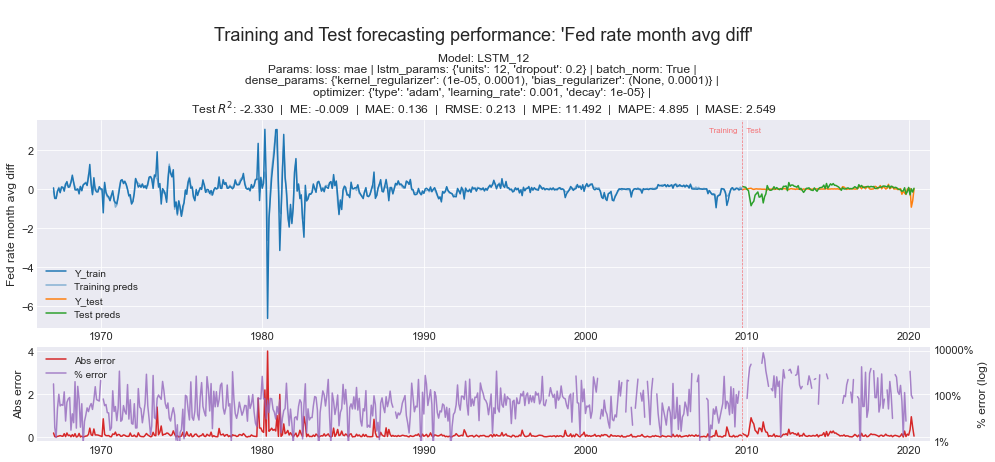

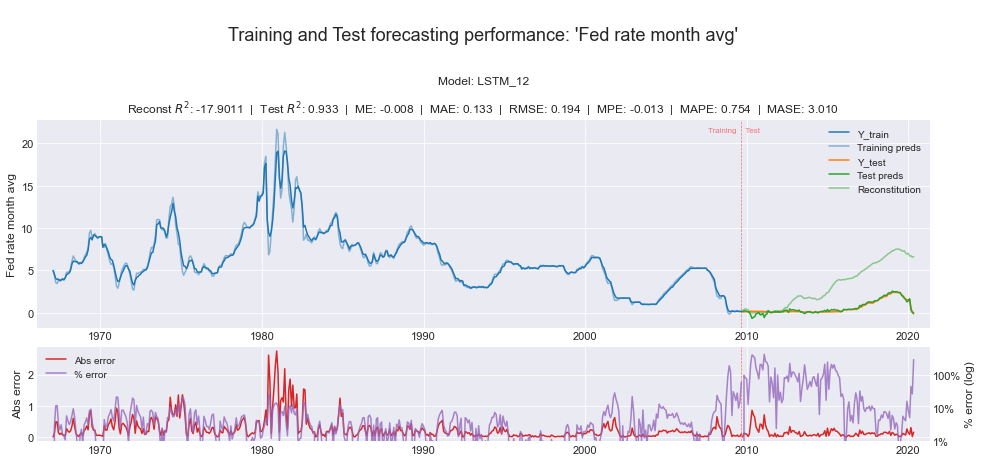

In [21]:
plot_models(
    [model],
    X_train,
    X_test,
    Y_train,
    Y_test,
    date_col="Date",
    predicted_feature=predicted_feature,
    plotted_feature=predicted_feature,
    estimator_params=[params],
    type_of_change=None,
    clip_to_zero=False,
    ncols=1,
)

plot_models(
    [model],
    X_train,
    X_test,
    Y_train,
    Y_test,
    date_col="Date",
    predicted_feature=predicted_feature,
    plotted_feature="Fed_rate_month_avg",
    type_of_change="diff",
    clip_to_zero=True,
    ncols=1
)

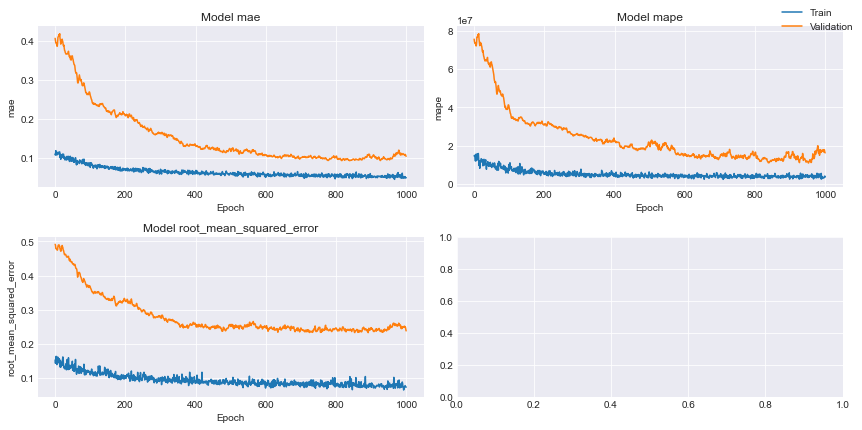

{'Test $R^2$': -0.1767717190459115,
 'ME': -0.08137185091914777,
 'MAE': 0.10317257834231537,
 'RMSE': 0.17527247809490262,
 'MPE': 134.26355401659373,
 'MAPE': 3.171283761725589,
 'MASE': 1.1662987116957388}

In [14]:
from math import ceil 
metrics = ["mae", "mape", "root_mean_squared_error"]
n_cols = 2
fig, axes = plt.subplots(nrows=ceil(len(metrics) / n_cols), ncols=n_cols, figsize=(12, len(metrics) // n_cols * 6))
for i, metric in enumerate(metrics):
    ax = axes[i // n_cols, i % n_cols]
    ax.plot(history.history[metric])
    ax.plot(history.history[f'val_{metric}'])
    ax.set_title(f'Model {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Epoch')
fig.legend(['Train', 'Validation'])
fig.tight_layout()
plt.show()

regression_metrics(Y_test[predicted_feature], model.predict(X_test).reshape(-1))
# model.predict(X_test)

In [10]:
# file_name_struct = '{:s}_{:s}'
# file_name = file_name_struct.format(
#     "LSTM_12",
#     predicted_feature.replace("_", "")
# ).replace(".", "")

# metrics = regression_metrics(Y_test[predicted_feature], model.predict(X_test).reshape(-1))
# metrics = {k: float(v) for k, v in metrics.items()}
# info = {}
# info["metrics"] = metrics
# info["model"] = params
# info["prediction"] = predicted_feature

# save_file(filepath = path + file_name + "_info.yaml", data=info, overwrite=False)
# model.save(filepath=path + file_name + ".h5", overwrite=False)